In [61]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [65]:
from proj1_helpers import *
import implementations as imp
%run pre_processing.ipynb

In [66]:
train_path = 'C:\\Users\\MehdiZayene\\Desktop\\train.csv'
test_path = 'C:\\Users\\MehdiZayene\\Desktop\\test.csv'

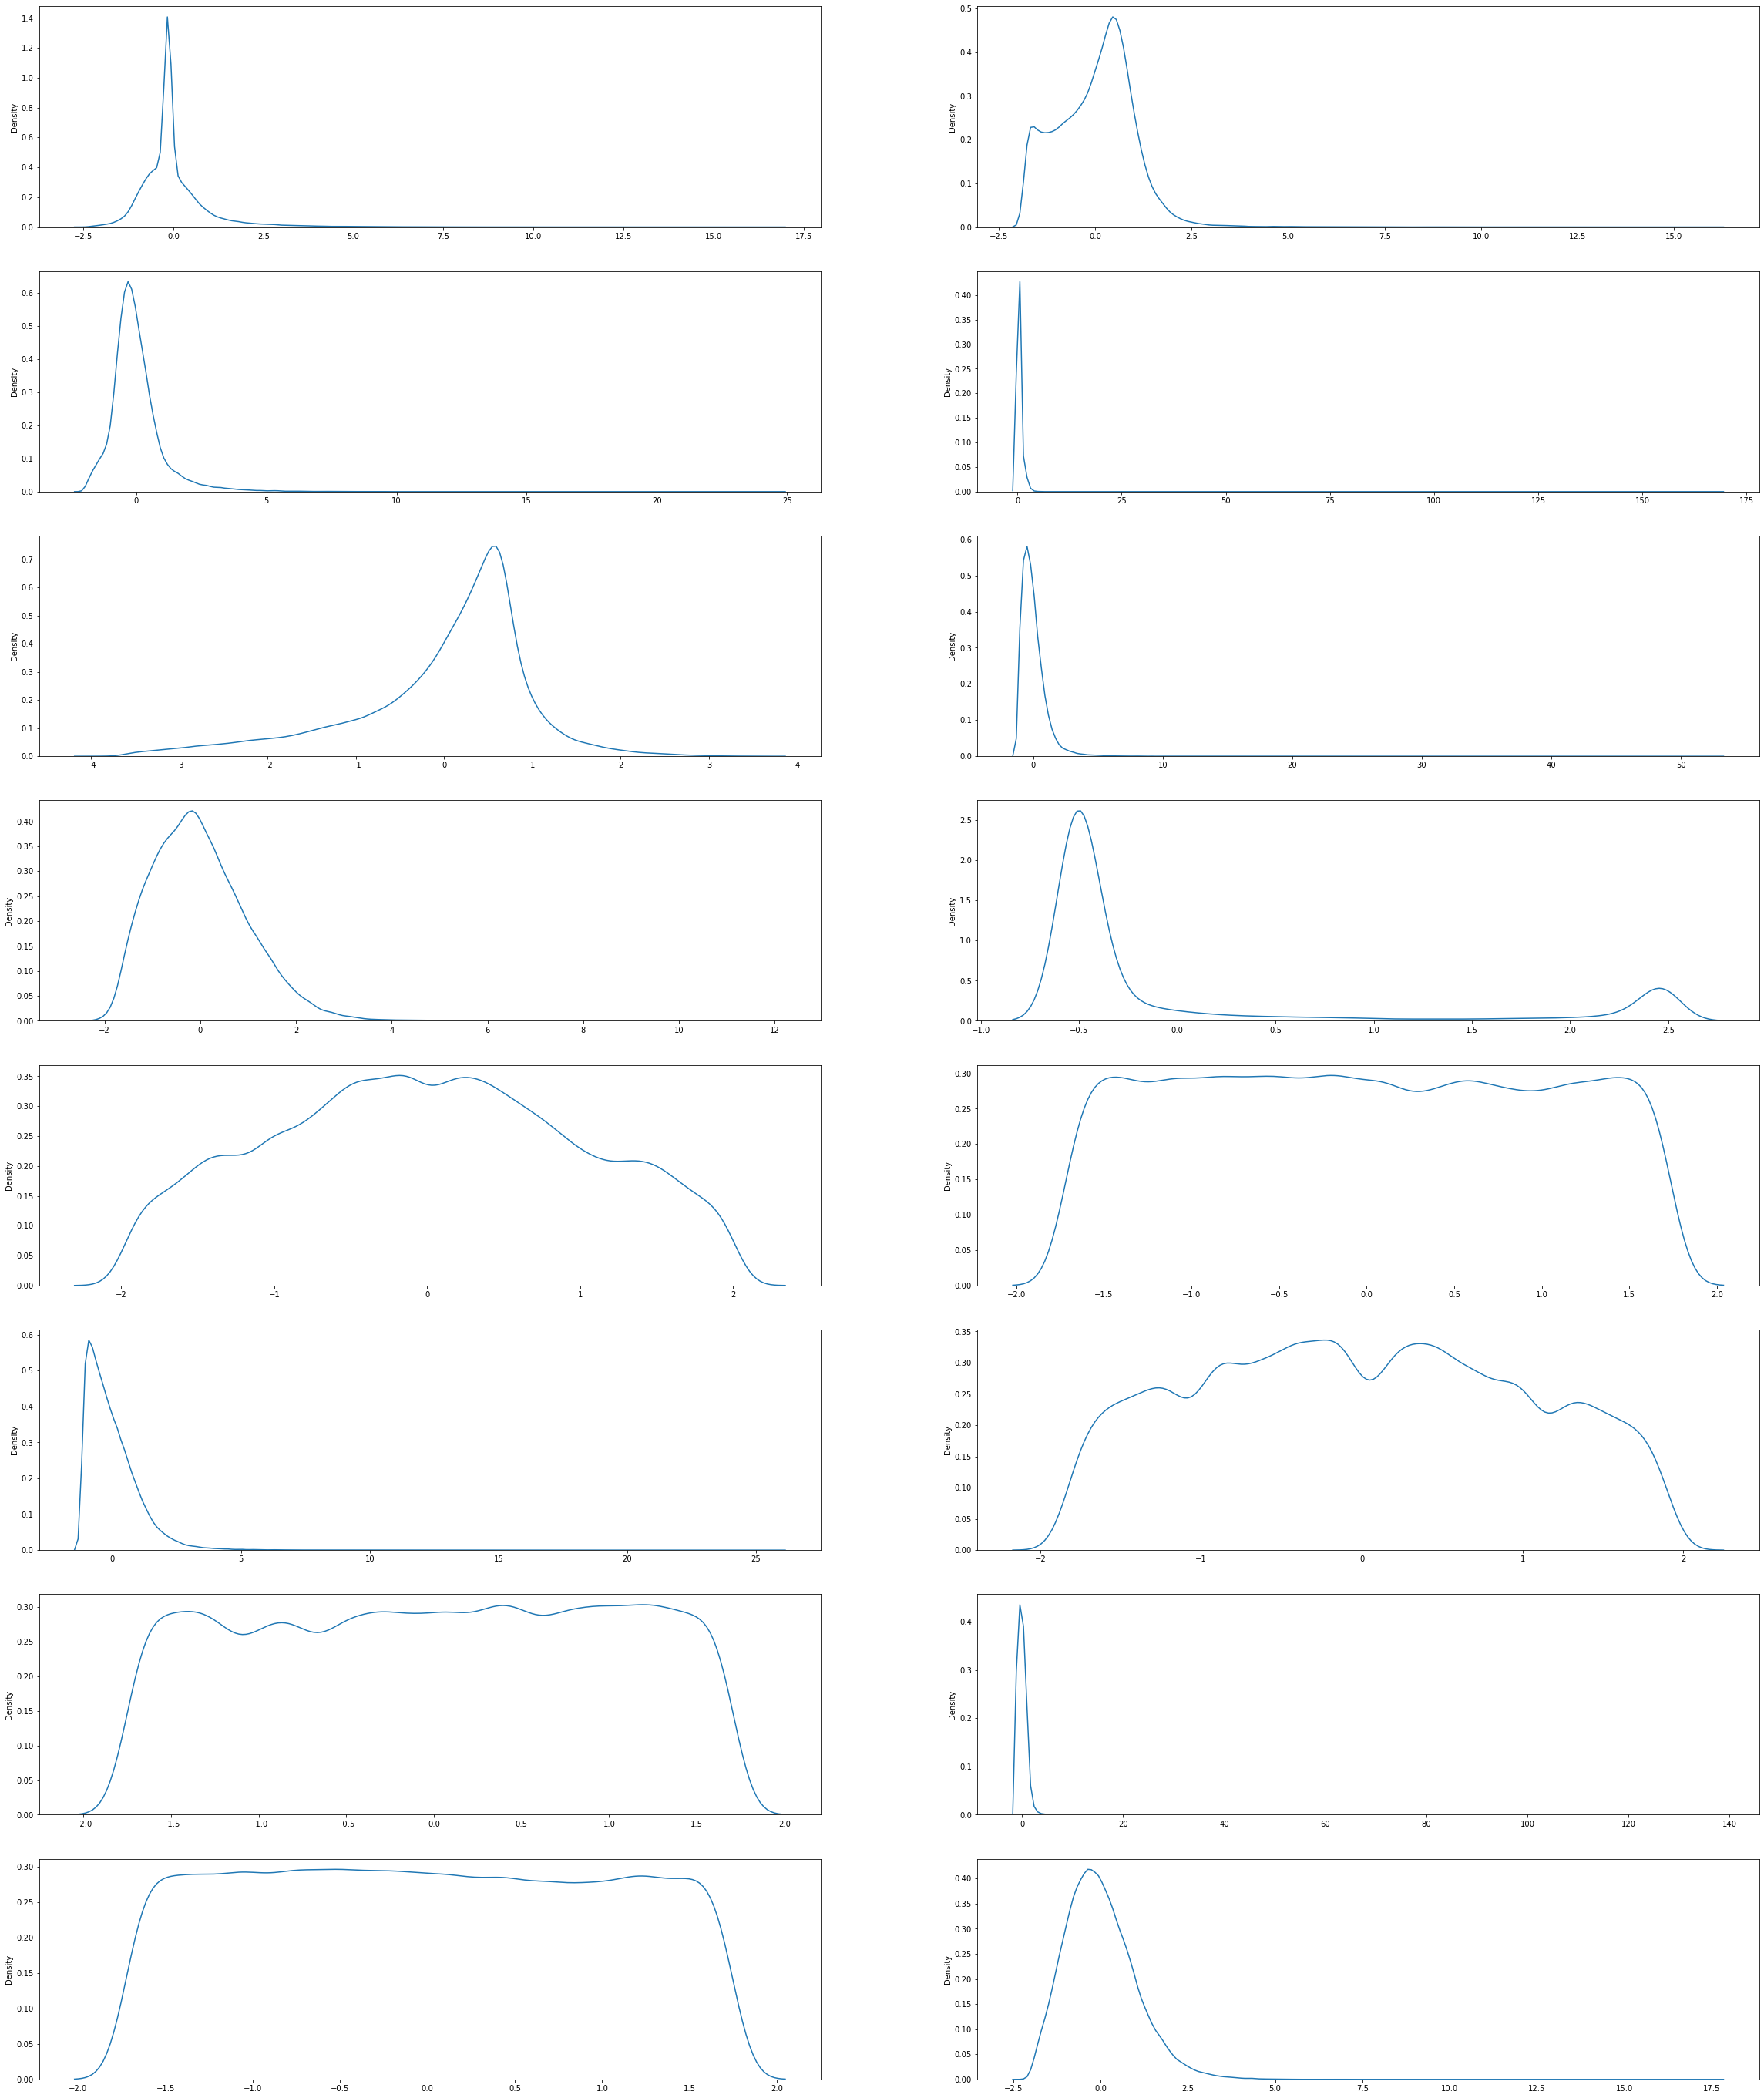

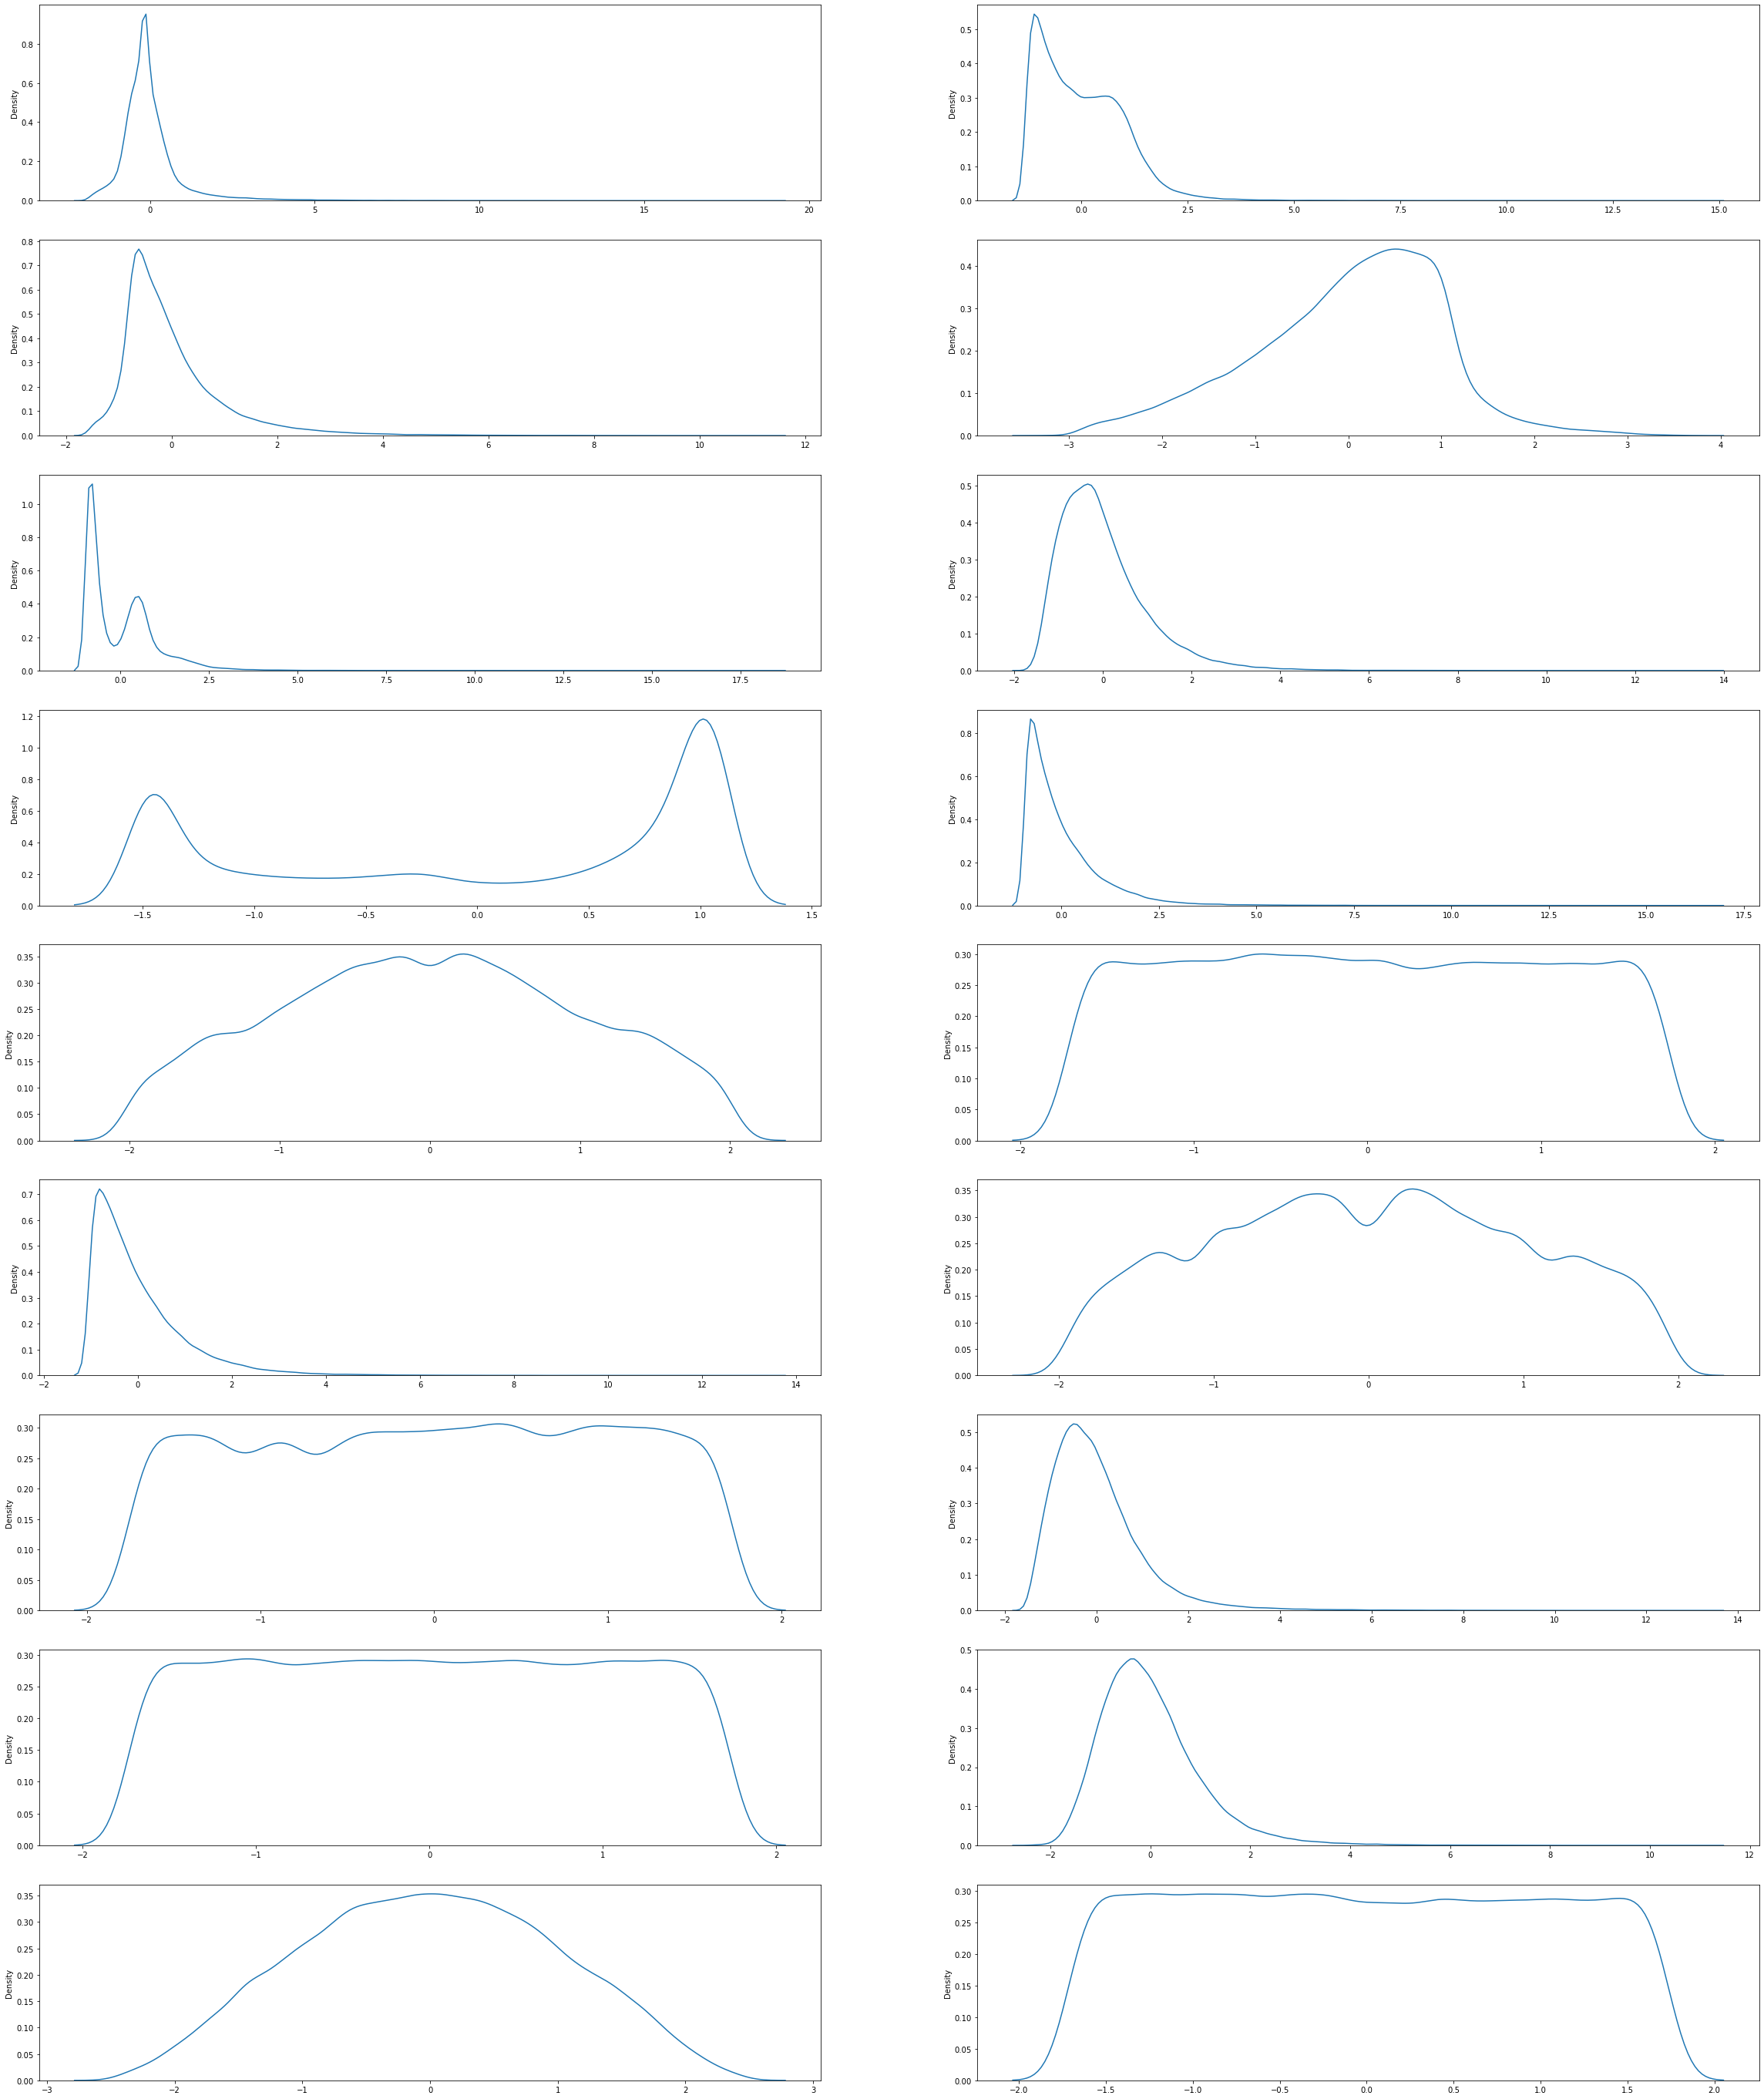

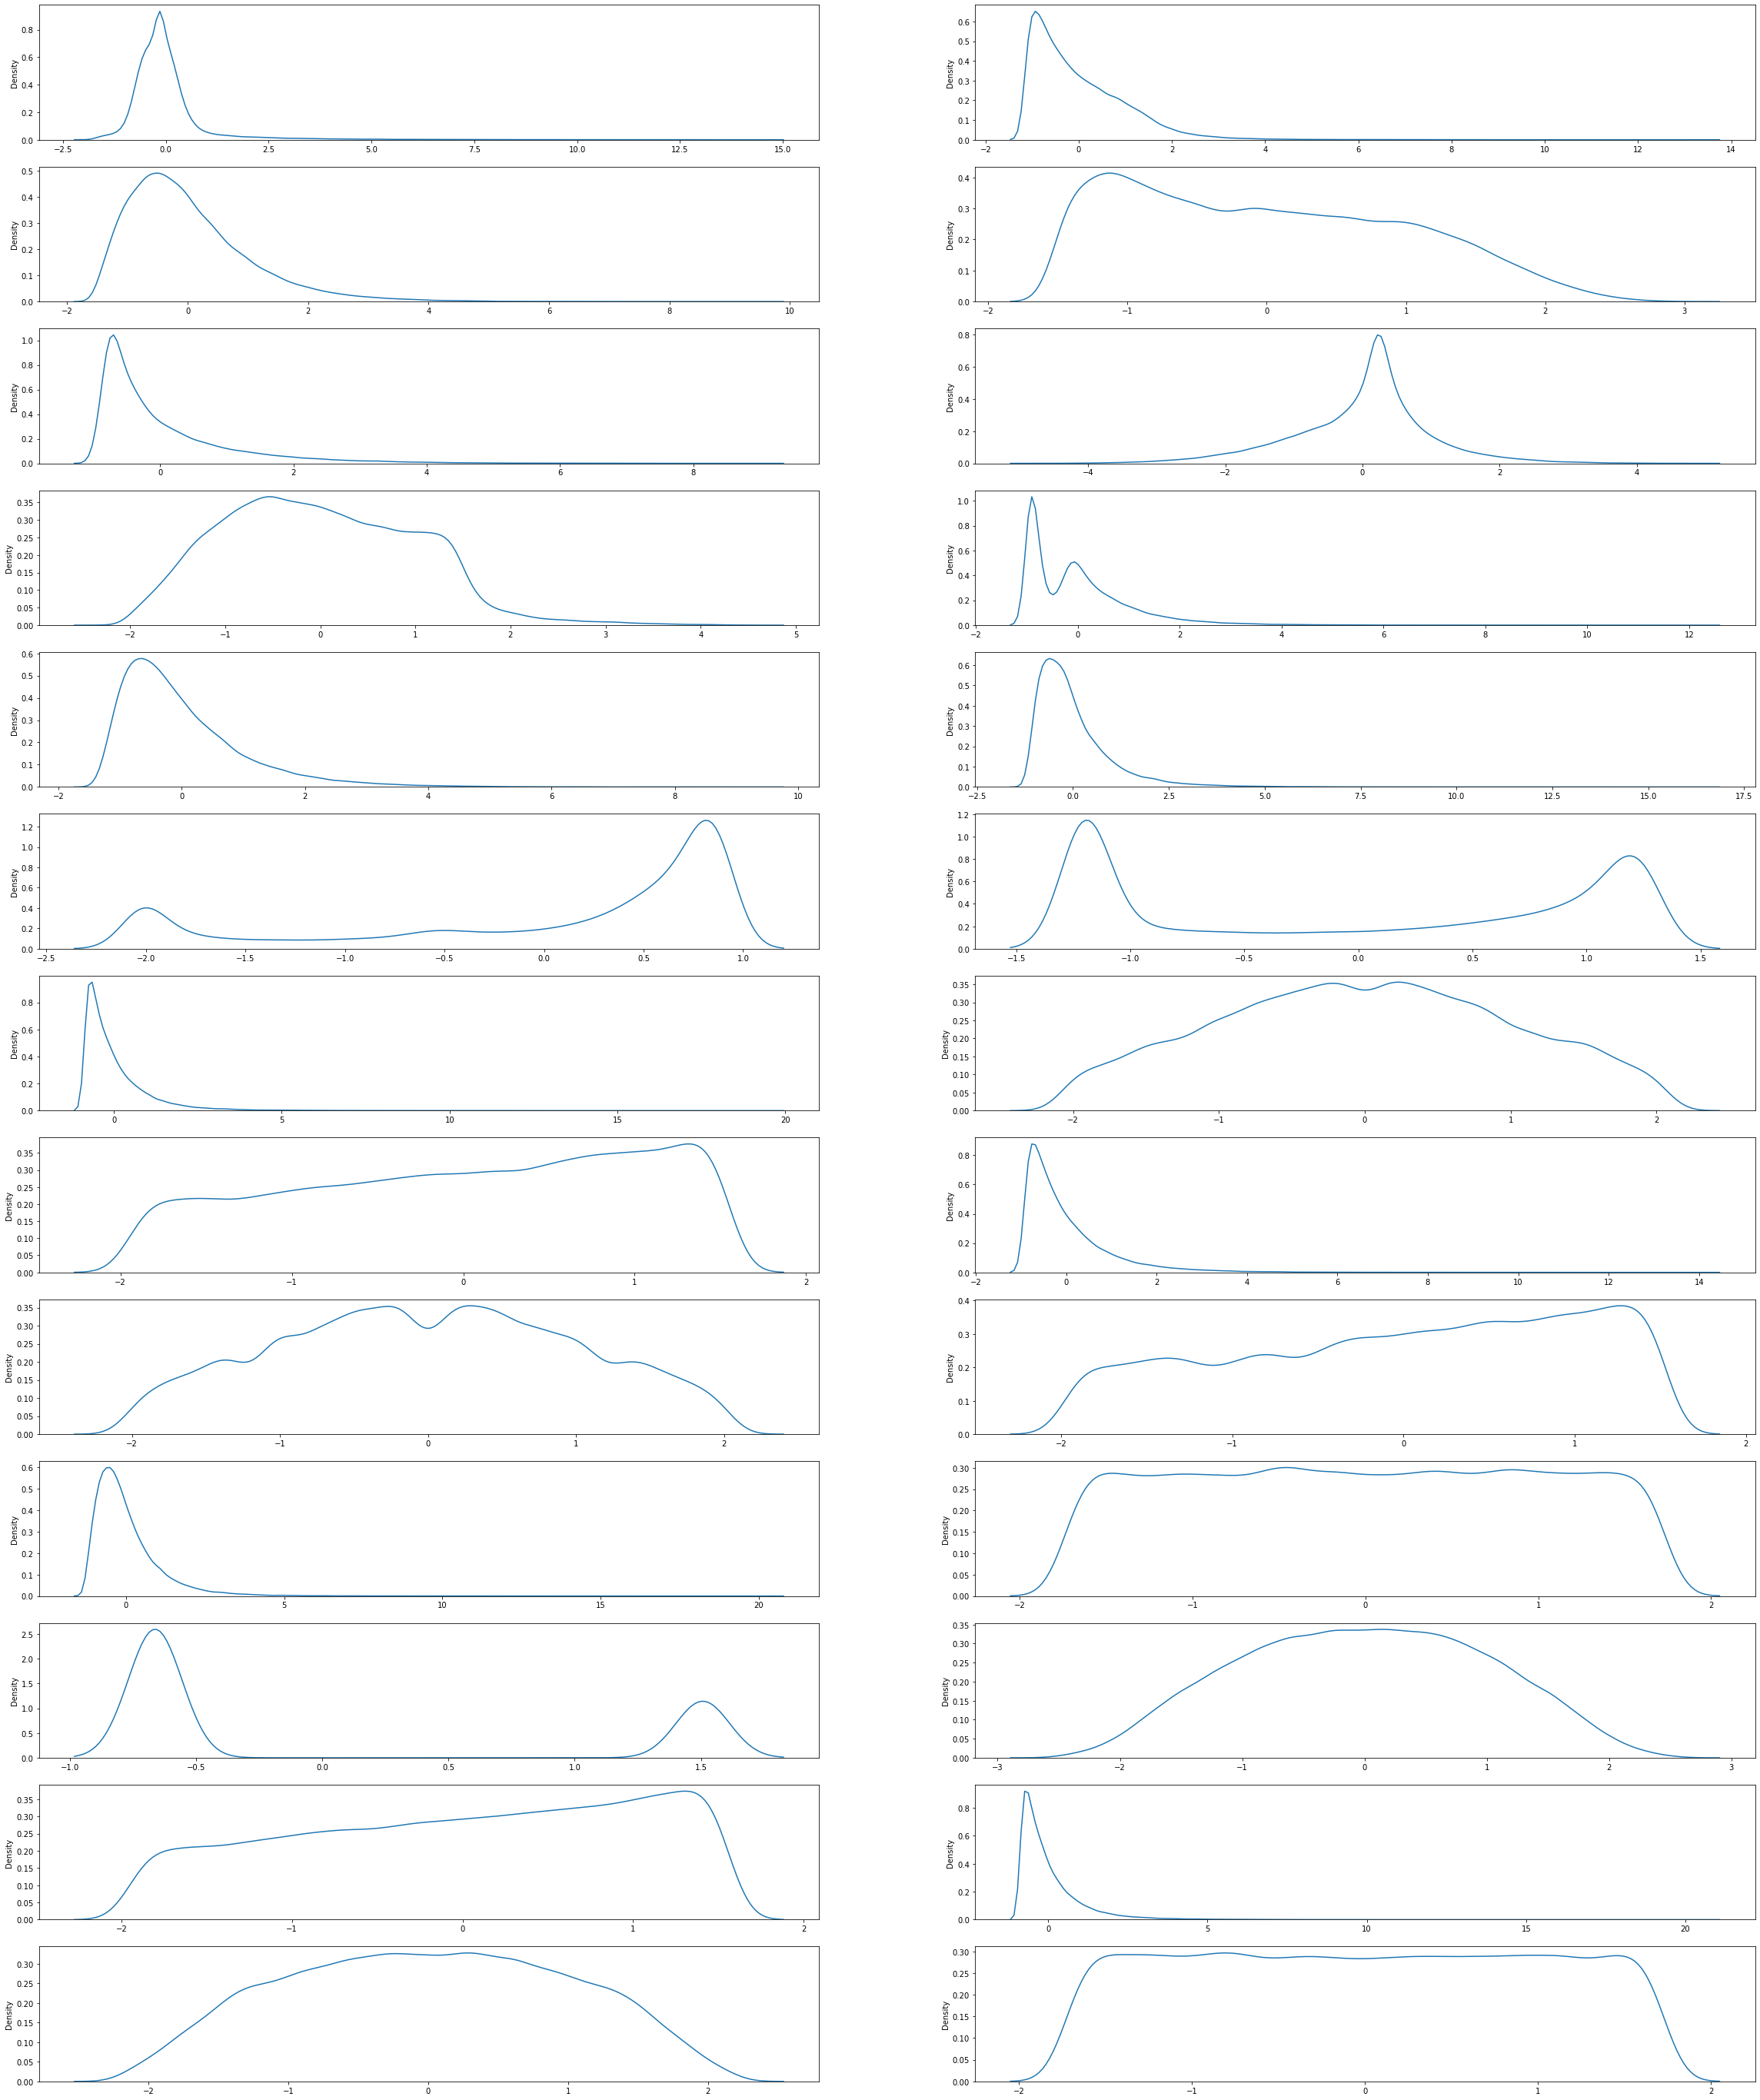

In [67]:
(tx_1,y_1,ids_1), (tx_2,y_2,ids_2), (tx_3,y_3,ids_3),indexes,parameters = process_data(train_path)

In [45]:
(xtest_1,ids_1), (xtest_2,ids_2), (xtest_3,ids_3) = process_test(test_path,indexes,parameters)

## Do your thing crazy machine learning thing here :) ...

In [46]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [47]:
def cross_validation(y, x, k_indices, k , degree):

    loss_te = np.array([])
    loss_tr = np.array([])
    #print(x.shape)
    for i in range(k):
        sub = np.delete(k_indices,i,axis=0).flatten()
        x_train = x[sub]
        y_train = y[sub]
        x_test = x[k_indices[i]]
        y_test = y[k_indices[i]]

        #print('train expanded',x_train.shape)
        #print('test expanded',x_test.shape)
        
        x_train = expand_with_pairwise_products(x_train,degree)
        x_test = expand_with_pairwise_products(x_test,degree)
        #x_train = np.append(x_train,np.exp(x_train),axis=1)
        
        #x_train = np.append(x_train,np.cos(x_train),axis=1)
        #x_train = np.append(x_train,np.sin(x_train),axis=1)
        #x_train = add_bias(x_train)
        #x_test = np.append(x_test,np.exp(x_test),axis=1)
        #x_test = np.append(x_test,np.cos(x_test),axis=1)
        #x_test = np.append(x_test,np.sin(x_test),axis=1)
        
        #x_test = add_bias(x_test)


        w,loss_train = imp.least_squares(y_train, x_train)
        

        loss_test = imp.compute_loss(y_test, x_test, w)
        print('loss test',loss_test)
        print('loss train',loss_train)
        loss_tr = np.append(loss_tr,loss_train)
        loss_te= np.append(loss_te,loss_test)
    
    return np.mean(loss_tr),np.mean(loss_te)

In [48]:
#tx_1 = np.append(tx_1,np.cos(tx_1),axis=1)
#tx_1 = np.append(tx_1,np.sin(tx_1),axis=1)
tx_1 = add_bias(tx_1)
#tx_1 = np.append(tx_1,np.exp(tx_1),axis=1)

In [49]:
tx_2 = build_poly(tx_2,5)
#tx_2 = np.append(tx_2,np.cos(tx_2),axis=1)
#tx_2 = np.append(tx_2,np.sin(tx_2),axis=1)
#tx_2 = np.append(tx_2,np.cos(tx_2),axis=1)

In [50]:
tx_3 = build_poly(tx_3,4)
#tx_3 = np.append(tx_3,np.cos(tx_3),axis=1)
#tx_3 = np.append(tx_3,np.sin(tx_3),axis=1)
#tx_3 = np.append(tx_3,np.cos(tx_3),axis=1)

In [60]:
#xtest_1 = np.append(xtest_1,np.cos(xtest_1),axis=1)
#xtest_1 = np.append(xtest_1,np.sin(xtest_1),axis=1)
xtest_1 = add_bias(xtest_1)
#xtest_1 = np.append(xtest_1,np.exp(xtest_1),axis=1)

In [52]:
xtest_2 = build_poly(xtest_2,5)
#xtest_2 = np.append(xtest_2,np.cos(xtest_2),axis=1)
#xtest_2 = np.append(xtest_2,np.sin(xtest_2),axis=1)
#xtest_2 = np.append(xtest_2,np.cos(xtest_2),axis=1)

In [53]:
xtest_3 = build_poly(xtest_3,4)
#xtest_3 = np.append(xtest_3,np.cos(xtest_3),axis=1)
#xtest_3 = np.append(xtest_3,np.sin(xtest_3),axis=1)
#xtest_3 = np.append(xtest_3,np.cos(xtest_3),axis=1)

In [54]:
w1 , l1 = imp.least_squares(y_1,tx_1)
w2 , l2 = imp.least_squares(y_2,tx_2)
w3 , l3 = imp.least_squares(y_3,tx_3)

## Generate predictions and save ouput in csv format for submission:

In [56]:
y_pred1 = predict_labels(w1, xtest_1)
y_pred2 = predict_labels(w2, xtest_2)
y_pred3 = predict_labels(w3, xtest_3)

In [57]:
y = np.concatenate((y_pred1,y_pred2))
y = np.concatenate((y,y_pred3))

In [58]:
ids = np.concatenate((ids_1,ids_2))
ids = np.concatenate((ids,ids_3))

In [59]:
OUTPUT_PATH = 'C:\\Users\\MehdiZayene\\Desktop\\results_poly_exp_cos_sin.csv'
create_csv_submission(ids, y,OUTPUT_PATH)